# Assignment 9
## Gal Dali

### Question 1

$ \text{The 1-Dimensional diffusion equation: } $

$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} $

$ L = 1, D = 0.1, T_R = 1, T_L = 0. \text{ (all quantities are in some arbitrary units)} $

$ \text{Solve for } t = 0 ... 2 $

$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} $$

$ T(x, 0) = f(x), \text{where: } $
$$
f(x) =
  \begin{cases}
    1, & x \geq L/2, \\
    0, & x < L/2.
  \end{cases}
$$

### Analytical Solution:

$$ T(x, t) = \sum_{n=1}^{\infty} A_{n} \cos \left( \frac{n \pi x}{L} \right) e^{-D \left( \frac{n \pi}{L} \right)^{2} t} $$






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

In [ ]:
def second_derivative_matrix(N, boundary_conditions):
    diag1 = np.ones(N - 1)
    diag0 = -2 * np.ones(N)

    # 0 is main diagonal, +1 is super-diagonal, -1 is subdiagonal
    M = np.diag(diag0, 0) + np.diag(diag1, 1) + np.diag(diag1, -1)

    if boundary_conditions == 'D':
        pass
    elif boundary_conditions == 'N':
        M[0, 1] = M[-1, -2] = 2
    elif boundary_conditions == 'P':
        M[0, -1] = M[-1, 0] = 1

    return M


def Crank_Nicolson(y0, T, D, dt, dx, boundary_conditions='D'):
    L = y0.shape[0]
    M = second_derivative_matrix(L, boundary_conditions)
    a = D * dt / (dx ** 2)
    A = np.eye(L) + 0.5 * a * M
    B = inv(np.eye(L) - 0.5 * a * M)
    BA = B @ A

    t = np.arange(0, T + 0.5 * dt, dt)
    y = np.zeros((t.shape[0], L))
    y[0, :] = y0

    for i in range(len(t) - 1):
        y[i + 1, :] = BA @ y[i, :]

    return y


def ftcs(y0, T, D, dt, dx, boundary_conditions='D'):
    L = y0.shape[0]  # L is the number of spatial points
    M = second_derivative_matrix(L, boundary_conditions)
    alpha = D * dt / (
            dx ** 2)  # Von-Neumann stability condition dictates that alpha must be less than or equal to 0.5 (from the exercise sheet)

    if alpha > 0.5:
        print("Your values for D, dt, and dx are not compatible with the Von-Neumann stability condition! Aborting...")
        return

    # According to the question and to my understanding, we have Dirichlet boundary conditions such that T_L = 0 and T_R = 1. But this is non-trivial, and in the exercise sheet there is no addressing about this case!
    A = np.eye(L) + alpha * M

    t = np.arange(0, T + 0.5 * dt, dt)
    y = np.zeros((t.shape[0], L))
    y[0, :] = y0

    for i in range(len(t) - 1):
        y[i + 1:] = A @ y[i, :]

    return y


def fully_implicit(y0, T, D, dt, dx, boundary_conditions='D'):
    L = y0.shape[0]  # L is the number of spatial points
    M = second_derivative_matrix(L, boundary_conditions)
    alpha = D * dt / (
            dx ** 2)  # Von-Neumann stability condition dictates that alpha must be less than or equal to 0.5 (from the exercise sheet)

    if alpha > 0.5:
        print("Your values for D, dt, and dx are not compatible with the Von-Neumann stability condition! Aborting...")
        return

    # According to the question and to my understanding, we have Dirichlet boundary conditions such that T_L = 0 and T_R = 1. But this is non-trivial, and in the exercise sheet there is no addressing about this case!
    A = np.eye(L) - alpha * M
    A_inverse = inv(A)

    t = np.arange(0, T + 0.5 * dt, dt)
    y = np.zeros((t.shape[0], L))
    y[0, :] = y0

    for i in range(len(t) - 1):
        y[i + 1:] = A_inverse @ y[i, :]

    return y

In [ ]:
D = 0.1
dx = 0.01
dt = 0.00025
T = 2
L = 1
xlim = [0, 1]

x = np.arange(xlim[0], xlim[1] + 0.5 * dx, dx)
y0 = np.zeros(len(x))
y0[x >= 0.5] = 1

boundary_conditions = 'D'

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

y = ftcs(y0, T, D, dt, dx, boundary_conditions)

im = axs[0].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[0])
axs[0].set_title('FTCS - Dirichlet')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')

y = fully_implicit(y0, T, D, dt, dx, boundary_conditions)

im = axs[1].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[1])
axs[1].set_title('Fully Implicit - Dirichlet')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')

y = Crank_Nicolson(y0, T, D, dt, dx, boundary_conditions)

im = axs[2].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[2])
axs[2].set_title('Crank-Nicolson - Dirichlet')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')

plt.tight_layout()
plt.show()

boundary_conditions = 'N'

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

y = ftcs(y0, T, D, dt, dx, boundary_conditions)

im = axs[0].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[0])
axs[0].set_title('FTCS - Neumann')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')

y = fully_implicit(y0, T, D, dt, dx, boundary_conditions)

im = axs[1].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[1])
axs[1].set_title('Fully Implicit - Neumann')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')

y = Crank_Nicolson(y0, T, D, dt, dx, boundary_conditions)

im = axs[2].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[2])
axs[2].set_title('Crank-Nicolson - Neumann')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')

plt.tight_layout()
plt.show()

boundary_conditions = 'P'

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

y = ftcs(y0, T, D, dt, dx, boundary_conditions)

im = axs[0].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[0])
axs[0].set_title('FTCS - Periodic')
axs[0].set_xlabel('x')
axs[0].set_ylabel('t')

y = fully_implicit(y0, T, D, dt, dx, boundary_conditions)

im = axs[1].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[1])
axs[1].set_title('Fully Implicit - Periodic')
axs[1].set_xlabel('x')
axs[1].set_ylabel('t')

y = Crank_Nicolson(y0, T, D, dt, dx, boundary_conditions)

im = axs[2].imshow(y, extent=(xlim[0], xlim[1], 0, T), aspect='auto', origin='lower')
fig.colorbar(im, ax=axs[2])
axs[2].set_title('Crank-Nicolson - Periodic')
axs[2].set_xlabel('x')
axs[2].set_ylabel('t')

plt.tight_layout()
plt.show()

### Question 2

$ \text{The Schrödinger Equation: } $

$$ i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \psi + V(x) \psi $$
$$ \frac{\partial \psi}{\partial t} = -\frac{i}{\hbar} H \psi $$

$ \text{Particle in a box of length 2L: } $

$ x \in [-L, L] $
$$ V(x) = \begin{cases} V_0e^{-\frac{x^2}{2[m]^2}} \space; & -L < x < L \\ \infty \space ; & else \end{cases} $$

$ \text{Boundary conditions: } $

$ \psi(-L, t) = \psi(L, t) = 0 $

$ \text{Initial condition: } $

$ \psi(x, 0) = Ae^{-(x - x_0)^2 [\frac{1}{m}]^2} e^{ikx} $

$ \text{Solve for } t = 0 ... 2 $

$ \text{The parameters: } $

$ \hbar = 1 [\frac{J}{s}],\space m = 1 [kg],\space x_0 = -5 [m],\space k = 2 [\frac{1}{m}],\space L = 20 [m],\space V_0 = 10 [J] $

TypeError: Image data of dtype complex128 cannot be converted to float

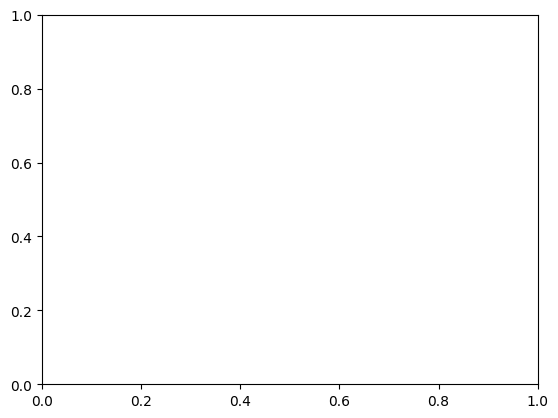

In [17]:
def Schrodinger(y0, T, V0, m, x, hbar, dx, dt):
    N = y0.shape[0]
    V = np.zeros((N, N))
    for i in range(N):
        V[i, i] = V0 * np.exp(-1 * (x[i] ** 2) / 2)
    M = ((-((hbar ** 2) / (2 * m))) / (dx ** 2)) * second_derivative_matrix(N, 'D')
    H = M + V
    A = inv(np.eye(N) + 0.5j * (dt / hbar) * H)
    B = np.eye(N) - 0.5j * (dt / hbar) * H
    AB = A @ B

    t = np.arange(0, T + 0.5 * dt, dt)
    y = np.zeros((len(t), len(x))).astype(complex)
    y[0, :] = y0

    for i in range(len(t) - 1):
        y[i + 1, :] = AB @ y[i, :]

    return y


hbar = 1
m = 1
x0 = -5
k = 2
L = 20
V0 = 10

dx = 0.01
dt = 0.00025
T = 2
# A was not given! It is not possible to find without using erf function (from normalization condition). It is approximately equal to sqrt((sqrt(2)) / (sqrt(pi) * erf(sqrt(2) * 25)) which is about 0.893 (erf(sqrt(2) * 25) approximately equals 1)
A = 0.893
xlim = [-L, L]

x = np.arange(xlim[0], xlim[1] + 0.5 * dx, dx)
y0 = np.zeros(len(x)).astype(complex)
for q in range(len(y0)):
    y0[q] = A * np.exp(-1 * (x[q] - x0) ** 2) * np.exp(1j * k * x[q])



y = Schrodinger(y0, T, V0, m, x, hbar, dx, dt)

plt.imshow(y, extent=(xlim[0],xlim[1], 0 ,T), aspect='auto', origin='lower')
plt.colorbar()
plt.title('Schrödinger')
plt.xlabel('x')
plt.ylabel('t')
plt.show()